# Runtime Dependencies: Must Run First!

In [2]:
import numpy as np
import pandas as pd

# ### Bonus: Multiple Outputs Per Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Module 5: Pandas — SQL Functionality

In the previous notebook, you had an intoduction to Pandas, Series, DataFrames, and basic manipulations including broadcasting and column-wise operations.

Now, we're going to add operations that are considered SQL-like for tabular data.

Let's have an overview:

- 5.8 Aggregate Functionality
- 5.9 Filters
- 5.10 Group By
- 5.11 Summarize
- 5.12 Merging Tables
- 5.13 Window: Shift
- 5.14 Window: Rolling
- 5.15 Window: Expanding

Let's get into it!

## Module 5.8: Aggregate Functions

Eariler, you learned how to calculate new columns based upon existing data.

Now, we can start doing the opposite: calculating column statistics!

In NumPy, we covered a bunch of array calculation methods for summary statistics, like mean, max, min, sum, product, variance, and standard deviation. We use these in a very similar way!

Let's import our vaccination data, as of Feb8 2021.

In [3]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/covid19_vaccinations_in_the_united_states.csv"

df = pd.read_csv(loc, header=2, index_col="State/Territory/Federal Entity")
df

,Total Delivered,Total Administered,Delivered per 100K,Administered per 100K,People with 1+ Doses,People with 1+ Doses per 100K,People with 2 Doses,People with 2 Doses Per 100K
State/Territory/Federal Entity,,,,,,,,
Alaska,248500,150934,33969.0,20632.0,109890,15022,40812,5579
Alabama,804100,467636,16400.0,9537.0,378514,7720,88453,1804
Arkansas,540050,401664,17895.0,13310.0,304604,10094,94058,3117
American Samoa,29450,12259,52883.0,22013.0,9779,17560,2478,4450
Arizona,1186000,841018,16294.0,11554.0,678697,9324,161324,2216
...,...,...,...,...,...,...,...,...
Vermont,116075,90328,18602.0,14476.0,63024,10100,27144,4350
Washington,1208600,937926,15872.0,12317.0,731739,9609,193678,2543
Wisconsin,926300,763252,15909.0,13109.0,595912,10235,159160,2734


### Aggregate Functions on DataFrame

Let's take a minute to discuss what the mean of each column means!

In [4]:
df.mean()

Total Delivered                  941393.650794
Total Administered               673295.507937
Delivered per 100K                19889.898305
Administered per 100K             13055.440678
People with 1+ Doses             513335.650794
People with 1+ Doses per 100K      9206.412698
People with 2 Doses              151079.603175
People with 2 Doses Per 100K       2842.412698
dtype: float64

### Aggregate Functions on Subset of Data

Just like with broadcasting and element-wise operations, our indexing comes back!

Let's calculate the standard deviation of vaccines delivered per 100K:

In [5]:
df['Delivered per 100K'].std()

8529.282847111564

Let's calculate how many people in the United States have at least one dose (as of Feb8):

In [7]:
df['People with 1+ Doses'].sum()

32340146

Let's calculate how many people in the United States have both their doses (as of Feb8):

In [8]:
df['People with 2 Doses'].sum()

9518015

## Module 5.9: Filtering Data

Sometimes, we don't want all of our data!

This is where filtering comes in handy!

The general rule for filtering is that we need to have a logical statement that creates True/False values, and then the filter selects out the True rows.

The general syntax looks like:

```python
df[predicate]
```

Where the predicate is any boolean expression that can be mapped onto the underlying DataFrame.

### National COVID Dataset — As of 1-12-2021

https://github.com/mhall-simon/python/blob/main/data/covid/national-history-1-12-2020.csv

In [5]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/national-history-1-12-2020.csv"

df = pd.read_csv(loc, parse_dates=True, index_col=0)
df.head()

,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,
2021-01-12,371449.0,4056,39049.0,23881.0,15260,131326.0,748277.0,208367360.0,1366355,3796.0,7879.0,22538426.0,213885,56,271960830,1871244
2021-01-11,367393.0,1739,38823.0,23494.0,3173,129748.0,733017.0,207001005.0,1433931,3773.0,7781.0,22324541.0,193857,56,270089586,1897059
2021-01-10,365654.0,2042,38706.0,23640.0,2413,129223.0,729844.0,205567074.0,1405939,3771.0,7878.0,22130684.0,227286,56,268192527,1987882
2021-01-09,363612.0,3558,38607.0,23718.0,6664,130781.0,727431.0,204161135.0,1351137,3767.0,7791.0,21903398.0,266266,56,266204645,2039810
2021-01-08,360054.0,3777,38432.0,23886.0,4616,131889.0,720767.0,202809998.0,1367485,3756.0,7909.0,21637132.0,293104,56,264164835,2120518


### Filtering with Single Argument

This operation is going to select the subset of data where daily deaths is greater than or equal to 3500.

In [6]:
df[df.deathIncrease >= 3500]

,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,
2021-01-12,371449.0,4056,39049.0,23881.0,15260,131326.0,748277.0,208367360.0,1366355,3796.0,7879.0,22538426.0,213885,56,271960830,1871244
2021-01-09,363612.0,3558,38607.0,23718.0,6664,130781.0,727431.0,204161135.0,1351137,3767.0,7791.0,21903398.0,266266,56,266204645,2039810
2021-01-08,360054.0,3777,38432.0,23886.0,4616,131889.0,720767.0,202809998.0,1367485,3756.0,7909.0,21637132.0,293104,56,264164835,2120518
2021-01-07,356277.0,4081,38236.0,23821.0,5318,132370.0,716151.0,201442513.0,1217934,3748.0,7900.0,21344028.0,269452,56,262044317,1918094
2021-01-06,352196.0,3866,38064.0,23716.0,6709,132464.0,710833.0,200224579.0,1021419,3739.0,7944.0,21074576.0,247786,56,260126223,1619168
2021-01-05,348330.0,3522,37841.0,23512.0,4153,131215.0,704124.0,199203160.0,1169064,3718.0,7976.0,20826790.0,215413,56,258507055,1608732
2020-12-30,333524.0,3903,36855.0,23059.0,5538,125218.0,681868.0,192423090.0,969115,3653.0,7931.0,19542595.0,226259,56,248708964,1538124


Let's look at the predicate closer! It's a series of True/False values, and we extract the true values.

In [7]:
df.deathIncrease >= 3500

date
2021-01-12     True
2021-01-11    False
2021-01-10    False
2021-01-09     True
2021-01-08     True
              ...  
2020-01-17    False
2020-01-16    False
2020-01-15    False
2020-01-14    False
2020-01-13    False
Name: deathIncrease, Length: 366, dtype: bool

### Filtering with Multiple Arguments: And

In [10]:
df[(df.index.year==2021) & (df.positiveIncrease >= 200000)]

,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,
2021-01-12,371449.0,4056,39049.0,23881.0,15260,131326.0,748277.0,208367360.0,1366355,3796.0,7879.0,22538426.0,213885,56,271960830,1871244
2021-01-10,365654.0,2042,38706.0,23640.0,2413,129223.0,729844.0,205567074.0,1405939,3771.0,7878.0,22130684.0,227286,56,268192527,1987882
2021-01-09,363612.0,3558,38607.0,23718.0,6664,130781.0,727431.0,204161135.0,1351137,3767.0,7791.0,21903398.0,266266,56,266204645,2039810
2021-01-08,360054.0,3777,38432.0,23886.0,4616,131889.0,720767.0,202809998.0,1367485,3756.0,7909.0,21637132.0,293104,56,264164835,2120518
2021-01-07,356277.0,4081,38236.0,23821.0,5318,132370.0,716151.0,201442513.0,1217934,3748.0,7900.0,21344028.0,269452,56,262044317,1918094
2021-01-06,352196.0,3866,38064.0,23716.0,6709,132464.0,710833.0,200224579.0,1021419,3739.0,7944.0,21074576.0,247786,56,260126223,1619168
2021-01-05,348330.0,3522,37841.0,23512.0,4153,131215.0,704124.0,199203160.0,1169064,3718.0,7976.0,20826790.0,215413,56,258507055,1608732
2021-01-03,343263.0,1461,37433.0,23243.0,2226,125562.0,695942.0,196776258.0,1001197,3688.0,7939.0,20433628.0,208144,56,255259670,1401449
2021-01-02,341802.0,2395,37309.0,23133.0,3051,123614.0,693716.0,195775061.0,1358739,3684.0,7910.0,20225484.0,278968,56,253858221,2060220


### Filtering with Multiple Arguments: Or

In [11]:
df[(df.deathIncrease >= 3000) | (df.positiveIncrease >= 300000)]

,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,
2021-01-12,371449.0,4056,39049.0,23881.0,15260,131326.0,748277.0,208367360.0,1366355,3796.0,7879.0,22538426.0,213885,56,271960830,1871244
2021-01-09,363612.0,3558,38607.0,23718.0,6664,130781.0,727431.0,204161135.0,1351137,3767.0,7791.0,21903398.0,266266,56,266204645,2039810
2021-01-08,360054.0,3777,38432.0,23886.0,4616,131889.0,720767.0,202809998.0,1367485,3756.0,7909.0,21637132.0,293104,56,264164835,2120518
2021-01-07,356277.0,4081,38236.0,23821.0,5318,132370.0,716151.0,201442513.0,1217934,3748.0,7900.0,21344028.0,269452,56,262044317,1918094
2021-01-06,352196.0,3866,38064.0,23716.0,6709,132464.0,710833.0,200224579.0,1021419,3739.0,7944.0,21074576.0,247786,56,260126223,1619168
2021-01-05,348330.0,3522,37841.0,23512.0,4153,131215.0,704124.0,199203160.0,1169064,3718.0,7976.0,20826790.0,215413,56,258507055,1608732
2020-12-31,336811.0,3287,37066.0,23099.0,4290,125379.0,686158.0,193543537.0,1120447,3672.0,8003.0,19766247.0,223652,56,250457987,1749023
2020-12-30,333524.0,3903,36855.0,23059.0,5538,125218.0,681868.0,192423090.0,969115,3653.0,7931.0,19542595.0,226259,56,248708964,1538124
2020-12-29,329621.0,3299,36583.0,22843.0,5229,124693.0,676330.0,191453975.0,906276,3635.0,7883.0,19316336.0,195944,56,247170840,1246101


## Module 5.10: Groupby Functionality

In databases, we often need to collapse our data vertically and calculate useful summary statistics and calculate potential categorical differences.

Earlier, when we covered aggregate functions, we did something really similar! Except, that was for the entire column.

Now, we can create groups within columns, and calculate aggregates for those groups!

There's a lot of things we can potentially aggregate on:

**Time Based:**
- Months
- Quarters
- Years

**Categorical:**
- State
- Country
- Store
- Color

And more!

### Groupby Formula

The groupby call in Pandas has a few considerations:

1. DataFrame to Group
2. Arguments to Group On
3. Slice of DataFrame to Return
4. Method to Calculate Summary Statistic

### State-By-State COVID Data - As of 12-29-2020

In [20]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/all-states-history-12-29-2020.csv"

df = pd.read_csv(loc, parse_dates=True, dtype={'dataQualityGrade': str}, index_col=0)
df.head(10)

,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-29,AK,A,201.0,201.0,1,NaN,1004.0,1004.0,83.0,10,NaN,NaN,1215264.0,5273,NaN,NaN,1204992.0,NaN,10.0,44581.0,NaN,175,0,NaN,NaN,NaN,NaN,53470.0,7165.0,NaN,0,1259845.0,5448,NaN,NaN,NaN,NaN,NaN,0,1259845.0,5448
2020-12-29,AL,A,4737.0,4138.0,25,599.0,33452.0,33452.0,2804.0,453,2424.0,NaN,1571253.0,5055,NaN,NaN,NaN,1394.0,NaN,351804.0,283939.0,3907,0,NaN,NaN,NaN,NaN,NaN,193149.0,NaN,0,1855192.0,7075,NaN,NaN,86415.0,NaN,1855192.0,7075,NaN,0
2020-12-29,AR,A+,3603.0,3042.0,66,561.0,11168.0,11168.0,1161.0,106,NaN,382.0,1841869.0,5901,NaN,NaN,1841869.0,1199.0,198.0,219246.0,182627.0,2718,0,NaN,3300.0,NaN,43844.0,NaN,194436.0,NaN,0,2024496.0,7350,NaN,21856.0,NaN,232799.0,NaN,0,2024496.0,7350
2020-12-29,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
2020-12-29,AZ,A+,8640.0,7837.0,171,803.0,36075.0,36075.0,4475.0,445,NaN,1053.0,2310576.0,9244,NaN,NaN,NaN,NaN,720.0,507222.0,483786.0,2799,0,NaN,NaN,NaN,NaN,NaN,74223.0,NaN,0,4961687.0,27199,389267.0,NaN,NaN,NaN,2794362.0,11607,4961687.0,27199
2020-12-29,CA,B,24526.0,NaN,242,NaN,NaN,NaN,21240.0,0,NaN,4390.0,30187250.0,214710,NaN,NaN,NaN,NaN,NaN,2187221.0,2187221.0,31245,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32374471.0,245955,NaN,NaN,NaN,NaN,NaN,0,32374471.0,245955
2020-12-29,CO,A,4687.0,4047.0,56,640.0,18230.0,18230.0,1188.0,268,NaN,NaN,1804203.0,3265,244844.0,NaN,NaN,NaN,NaN,328408.0,314771.0,1740,0,29935.0,NaN,NaN,NaN,NaN,17652.0,4343409.0,14513,4343409.0,14513,276149.0,NaN,NaN,NaN,2118974.0,4718,NaN,0
2020-12-29,CT,B,5924.0,4792.0,20,1132.0,12257.0,12257.0,1226.0,0,NaN,NaN,4096948.0,12916,NaN,NaN,NaN,NaN,NaN,181967.0,171329.0,767,0,NaN,NaN,NaN,NaN,NaN,9800.0,NaN,0,4278915.0,13683,NaN,49816.0,NaN,NaN,NaN,0,4268277.0,13603
2020-12-29,DC,A+,775.0,NaN,4,NaN,NaN,NaN,233.0,0,NaN,72.0,860457.0,2924,NaN,NaN,NaN,NaN,35.0,28535.0,NaN,193,0,NaN,NaN,NaN,NaN,NaN,20316.0,888992.0,3117,888992.0,3117,NaN,NaN,NaN,NaN,355136.0,1090,NaN,0


### Groupby State

Let's focus in on the first groupby argument, state. This is taking each state, and collapsing the data down by that category. 

To start, each state has a daily entry (about 300+ per state), and at the end, each state will have just one row!

Also, I am returning the "deathIncrease" column from the original dataset, and am summing the entries that are grouped together. *(This calculates the cumulative deaths per state)*

In [21]:
df.groupby('state')['deathIncrease'].sum()

state
AK      201
AL     4737
AR     3603
AS        0
AZ     8640
CA    24526
CO     4687
CT     5924
DC      775
DE      898
FL    21718
GA    10779
GU      121
HI      285
IA     3812
ID     1377
IL    17596
IN     8051
KS     2548
KY     2594
LA     7397
MA    12218
MD     5803
ME      333
MI    12966
MN     5196
MO     5433
MP        2
MS     4719
MT      939
NC     6574
ND     1283
NE     1587
NH      735
NJ    18777
NM     2403
NV     3019
NY    29756
OH     8722
OK     2405
OR     1433
PA    15353
PR     1460
RI     1760
SC     5198
SD     1446
TN     6710
TX    26762
UT     1235
VA     4920
VI       23
VT      130
WA     3195
WI     5152
WV     1284
WY      405
Name: deathIncrease, dtype: int64

### Groupby Month-Year

Let's get summary statistics for each month that has passed since the pandemic began last January.

Since the DateTime information is in the index, we can do some cool things easily!

If we just did month, January 2021 and January 2020 would be combined into one!

In [27]:
df.groupby([df.index.month, df.index.year])[['positiveIncrease','deathIncrease']].sum()

,,positiveIncrease,deathIncrease
date,date,,
1,2020,2,0
2,2020,16,5
3,2020,196813,4327
4,2020,876284,55267
5,2020,717826,41181
6,2020,831183,19477
7,2020,1899082,25256
8,2020,1455846,30239
9,2020,1190984,23332


### Combining Filters with Groupby

We can also combine filters with our groupby!

Just keep in mind that the order matters! If data is filtered out, you cannot use that in aggregation.

It'll depend upon what you want to do!

Let's filter out New York's COVID data, and then run a Month-Year groupby.

In [36]:
filt = df[df.state=='NY']

filt.groupby([filt.index.month, filt.index.year])[['positiveIncrease','deathIncrease']].sum()

,,positiveIncrease,deathIncrease
date,date,,
3,2020,75795,1550
4,2020,228577,16771
5,2020,66398,5584
6,2020,22684,950
7,2020,21560,295
8,2020,19742,178
9,2020,23893,151
10,2020,48831,328
11,2020,140500,940


Now let's do this the opposite way: run a Month-Year-State groupby and then select out NYS.

Step 1: Complex Group By

In [51]:
grpd = df.groupby([df.index.month, df.index.year, df.state])[['positiveIncrease','deathIncrease']].sum()
grpd

positiveIncrease  deathIncrease
date date state                                 
1    2020 FL                    0              0
          MA                    0              0
          WA                    2              0
2    2020 FL                    0              0
          IN                    0              0
...                           ...            ...
12   2020 VT                 2906             61
          WA                62932            492
          WI               101326           1658
          WV                34931            549
          WY                10618            190

[570 rows x 2 columns]

Step 2: Filter From Multi-Indexed DataFrame

In [52]:
grpd[grpd.index.get_level_values(2)=='NY']

,,,positiveIncrease,deathIncrease
date,date,state,,
3,2020,NY,75795,1550
4,2020,NY,228577,16771
5,2020,NY,66398,5584
6,2020,NY,22684,950
7,2020,NY,21560,295
8,2020,NY,19742,178
9,2020,NY,23893,151
10,2020,NY,48831,328
11,2020,NY,140500,940


Note: The inner is still a predicate array of True/False!

In [53]:
grpd.index.get_level_values(2)=='NY'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Module 5.11: Summary Functions

In Pandas, summary functions are what we want returned and calculated from the grouping operation.

Above, you saw an example of returning a column or two with a NumPy array operation being performed on them:

```python
['deathIncrease'].sum()
[['positiveIncrease','deathIncrease']].sum()
```

These work, but sometimes we want more complex calculations and data!

Back to our state by state covid data!

In [54]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/all-states-history-12-29-2020.csv"

df = pd.read_csv(loc, parse_dates=True, dtype={'dataQualityGrade': str}, index_col=0)
df.head(10)

,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-29,AK,A,201.0,201.0,1,NaN,1004.0,1004.0,83.0,10,NaN,NaN,1215264.0,5273,NaN,NaN,1204992.0,NaN,10.0,44581.0,NaN,175,0,NaN,NaN,NaN,NaN,53470.0,7165.0,NaN,0,1259845.0,5448,NaN,NaN,NaN,NaN,NaN,0,1259845.0,5448
2020-12-29,AL,A,4737.0,4138.0,25,599.0,33452.0,33452.0,2804.0,453,2424.0,NaN,1571253.0,5055,NaN,NaN,NaN,1394.0,NaN,351804.0,283939.0,3907,0,NaN,NaN,NaN,NaN,NaN,193149.0,NaN,0,1855192.0,7075,NaN,NaN,86415.0,NaN,1855192.0,7075,NaN,0
2020-12-29,AR,A+,3603.0,3042.0,66,561.0,11168.0,11168.0,1161.0,106,NaN,382.0,1841869.0,5901,NaN,NaN,1841869.0,1199.0,198.0,219246.0,182627.0,2718,0,NaN,3300.0,NaN,43844.0,NaN,194436.0,NaN,0,2024496.0,7350,NaN,21856.0,NaN,232799.0,NaN,0,2024496.0,7350
2020-12-29,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
2020-12-29,AZ,A+,8640.0,7837.0,171,803.0,36075.0,36075.0,4475.0,445,NaN,1053.0,2310576.0,9244,NaN,NaN,NaN,NaN,720.0,507222.0,483786.0,2799,0,NaN,NaN,NaN,NaN,NaN,74223.0,NaN,0,4961687.0,27199,389267.0,NaN,NaN,NaN,2794362.0,11607,4961687.0,27199
2020-12-29,CA,B,24526.0,NaN,242,NaN,NaN,NaN,21240.0,0,NaN,4390.0,30187250.0,214710,NaN,NaN,NaN,NaN,NaN,2187221.0,2187221.0,31245,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32374471.0,245955,NaN,NaN,NaN,NaN,NaN,0,32374471.0,245955
2020-12-29,CO,A,4687.0,4047.0,56,640.0,18230.0,18230.0,1188.0,268,NaN,NaN,1804203.0,3265,244844.0,NaN,NaN,NaN,NaN,328408.0,314771.0,1740,0,29935.0,NaN,NaN,NaN,NaN,17652.0,4343409.0,14513,4343409.0,14513,276149.0,NaN,NaN,NaN,2118974.0,4718,NaN,0
2020-12-29,CT,B,5924.0,4792.0,20,1132.0,12257.0,12257.0,1226.0,0,NaN,NaN,4096948.0,12916,NaN,NaN,NaN,NaN,NaN,181967.0,171329.0,767,0,NaN,NaN,NaN,NaN,NaN,9800.0,NaN,0,4278915.0,13683,NaN,49816.0,NaN,NaN,NaN,0,4268277.0,13603
2020-12-29,DC,A+,775.0,NaN,4,NaN,NaN,NaN,233.0,0,NaN,72.0,860457.0,2924,NaN,NaN,NaN,NaN,35.0,28535.0,NaN,193,0,NaN,NaN,NaN,NaN,NaN,20316.0,888992.0,3117,888992.0,3117,NaN,NaN,NaN,NaN,355136.0,1090,NaN,0


### Simple Aggregation — Multiple Calculations on One Column

In [60]:
df.groupby([df.index.month, df.index.year]).agg({'positiveIncrease': ['sum','max','std']})

positiveIncrease                    
                       sum    max          std
date date                                     
1    2020                2      1     0.245935
2    2020               16      3     0.452465
3    2020           196813   9298   600.134178
4    2020           876284  11571  1180.890613
5    2020           717826   4663   570.377972
6    2020           831183   9534   952.217934
7    2020          1899082  15149  2097.003078
8    2020          1455846  12614  1445.754320
9    2020          1190984  17820  1018.746390
10   2020          1885886   8489  1206.803002
11   2020          4409372  71734  3385.515946
12   2020          5803838  53711  5497.339423

Let's take a second to think about what each box means.

Sum - cumulate cases for each month
Max - most cases in singe day by a single state
Std - standard deviation of new daily cases, time series separated by state

### Complex Aggregation — Multiple Calculations on Multiple Columns

I'm breaking this one up to make it easier to see! Otherwise functionally everything is the same:

```python
df.groupby([df.index.month, df.index.year]).agg({'positiveIncrease': ['sum','max','std'],'deathIncrease': ['sum','max','std']})
```

It would look like this above when it's all in one line!

In [62]:
groupby_obj = df.groupby([df.index.month, df.index.year])

mapping = {'positiveIncrease': ['sum','max','std'], 'deathIncrease': ['sum','max','std']}

groupby_obj.agg(mapping)

positiveIncrease                     deathIncrease                
                       sum    max          std           sum  max        std
date date                                                                   
1    2020                2      1     0.245935             0    0   0.000000
2    2020               16      3     0.452465             5    2   0.263303
3    2020           196813   9298   600.134178          4327  332  16.206702
4    2020           876284  11571  1180.890613         55267  799  89.904619
5    2020           717826   4663   570.377972         41181  951  48.663762
6    2020           831183   9534   952.217934         19477  198  18.683205
7    2020          1899082  15149  2097.003078         25256  675  34.097300
8    2020          1455846  12614  1445.754320         30239  324  39.913426
9    2020          1190984  17820  1018.746390         23332  221  27.859994
10   2020          1885886   8489  1206.803002         23555  180  21.163258
11   2020          4409372  71734  3385.515946         37058  480  32.151372
12   2020          5803838  53711  5497.339423         69908  379  57.550141

## Module 5.12: Merging Tables Together

We often have data located in multiple tables, spreadsheets, or flat files that is related to each other.

We separate this data so that it's easier to import, manage, or analyze. However, we often want to recombine these into one.

There's four main ways to combine data:

1. Concat: Join Datasets Based Upon Axis, Add Rows or Columns
2. Append: Special Case of Concat (Add Rows, Outer Join)
3. Join: Combine Datasets on Common Key Using Indicies
2. Merge: Combine Datasets on Common Key Using Indicies / Columns (Left on... Right on... Left Index... Right Index...)

These may seem similar at first, but they're very different operations. The best is when you need to perform multiple operations on a highly-segmented dataset!

In this overview, I am showing examples of Concat and Merge. *Append is a special case of Concat and Join is a subset of Merge*

### Concatenating Tables Together

In the following Excel sheet, there's a sheet for each month (0,1,2).

I'm wrapping the functionality in a function so we can make it fast and easy to use!

This first example is the same between concatenate and append!

In [68]:
loc="https://github.com/mhall-simon/python/blob/main/data/misc/inventory-sales-3months.xlsx?raw=true"

df = pd.read_excel(loc, sheet_name=0)
df

,Part,Price,Quantity,Revenue
0,A-01,2.49,312,776.88
1,A-02,3.15,500,1575.00
2,A-03,5.98,345,2063.10
3,A-04,2.17,780,1692.60
4,A-05,4.01,590,2365.90
5,A-06,0.75,567,425.25
6,B-01,11.88,58,689.04
7,B-02,5.98,60,358.80
8,B-03,15.50,55,852.50
9,B-04,9.98,100,998.00


In [71]:
def pandas_concat(df, loc, n):
    new = pd.read_excel(loc, sheet_name=n)
    return pd.concat([df,new])

In [73]:
df = pandas_concat(df, loc, 1)
df = pandas_concat(df, loc, 2)
df

,Part,Price,Quantity,Revenue
0,A-01,2.49,312,776.88
1,A-02,3.15,500,1575.00
2,A-03,5.98,345,2063.10
3,A-04,2.17,780,1692.60
4,A-05,4.01,590,2365.90
5,A-06,0.75,567,425.25
6,B-01,11.88,58,689.04
7,B-02,5.98,60,358.80
8,B-03,15.50,55,852.50
9,B-04,9.98,100,998.00


### Merge Operations

Above, you saw how to concatenate data into a DataFrame, which makes our sets longer.

However, we sometimes have common-keyed data in multiple sheets that we want together for analysis.

A very common example of this is a CRM. We can have multiple tables of data all tied together using a common ID number. For analytical predictions or to run a regression, we may need all of the data in one place.

There's 4 types of merge operations:

1. Outer - Return all rows, regardless of matches
2. Inner - Only return rows that had keys match
3. Left - Return only left table rows, regardless of matches
4. Right - Return only right table rows, regardless of matches

These differences will determine what is returned from the merge operation!

I skip over right merge, as right merge is the same as a left merge if you flip the two arguments!

Below, I am importing an Excel spreadsheet with 3 small CRM tables.

In [75]:
loc = "https://github.com/mhall-simon/python/blob/main/data/misc/small-crm.xlsx?raw=true"

contacts = pd.read_excel(loc, sheet_name=0, index_col=0)
contacts

business = pd.read_excel(loc, sheet_name=1, index_col=0)
business

pipeline = pd.read_excel(loc, sheet_name=2, index_col=0)
pipeline

,Name,Email,Phone
ID,,,
C-01,Matt,matt@simon.edu,212-345-8888
C-02,Aneli,aneli@simon.edu,212-555-9898
C-03,Olive,olive@simon.edu,212-555-6688
C-04,Taylor,taylor@simon.edu,212-455-1111
C-05,Shelby,shelby@simon.edu,212-455-2323


,Entity,Owner,State
ID,,,
B-01,MX Consulting,C-01,NY
B-02,AC Audio,C-02,OR
B-03,ArtSpace,C-05,WI


,Stage,Business,Revenue
ID,,,
D-01,Completed,B-01,3500
D-02,Completed,B-02,4500
D-03,Work In Progress,B-01,5000
D-04,Work In Progress,B-02,7500
D-05,Contracted,B-02,1500
D-06,Contracted,B-03,2500
D-07,Negotiation,B-01,5000
D-08,Negotiation,B-03,12000


### Outer Merge

Let's merge together our contact and business information using an outer merge first:

In [81]:
pd.merge(contacts, business, left_on="ID", right_on="Owner", how="outer")

,Name,Email,Phone,Entity,Owner,State
0,Matt,matt@simon.edu,212-345-8888,MX Consulting,C-01,NY
1,Aneli,aneli@simon.edu,212-555-9898,AC Audio,C-02,OR
2,Olive,olive@simon.edu,212-555-6688,NaN,NaN,NaN
3,Taylor,taylor@simon.edu,212-455-1111,NaN,NaN,NaN
4,Shelby,shelby@simon.edu,212-455-2323,ArtSpace,C-05,WI


### Inner Merge

Now let's change it to an inner merge. This will only return rows with matches, so Olive and Taylor drop out.

In [82]:
pd.merge(contacts, business, left_on="ID", right_on="Owner", how="inner")

,Name,Email,Phone,Entity,Owner,State
0,Matt,matt@simon.edu,212-345-8888,MX Consulting,C-01,NY
1,Aneli,aneli@simon.edu,212-555-9898,AC Audio,C-02,OR
2,Shelby,shelby@simon.edu,212-455-2323,ArtSpace,C-05,WI


### Left Merge

Let's now have business information as the left table, and merge contact information on the right hand side.

We're then going to take that data to merge everthing together (all three tables)

In [84]:
business_contacts = pd.merge(business, contacts, left_on="Owner", right_index=True, how="left")
business_contacts

,Entity,Owner,State,Name,Email,Phone
ID,,,,,,
B-01,MX Consulting,C-01,NY,Matt,matt@simon.edu,212-345-8888
B-02,AC Audio,C-02,OR,Aneli,aneli@simon.edu,212-555-9898
B-03,ArtSpace,C-05,WI,Shelby,shelby@simon.edu,212-455-2323


In [85]:
merged = pd.merge(pipeline, business_contacts, left_on="Business", right_index=True, how="left")
merged

,Stage,Business,Revenue,Entity,Owner,State,Name,Email,Phone
ID,,,,,,,,,
D-01,Completed,B-01,3500,MX Consulting,C-01,NY,Matt,matt@simon.edu,212-345-8888
D-02,Completed,B-02,4500,AC Audio,C-02,OR,Aneli,aneli@simon.edu,212-555-9898
D-03,Work In Progress,B-01,5000,MX Consulting,C-01,NY,Matt,matt@simon.edu,212-345-8888
D-04,Work In Progress,B-02,7500,AC Audio,C-02,OR,Aneli,aneli@simon.edu,212-555-9898
D-05,Contracted,B-02,1500,AC Audio,C-02,OR,Aneli,aneli@simon.edu,212-555-9898
D-06,Contracted,B-03,2500,ArtSpace,C-05,WI,Shelby,shelby@simon.edu,212-455-2323
D-07,Negotiation,B-01,5000,MX Consulting,C-01,NY,Matt,matt@simon.edu,212-345-8888
D-08,Negotiation,B-03,12000,ArtSpace,C-05,WI,Shelby,shelby@simon.edu,212-455-2323


### Bonus Box: We Can Filter / Groupby & Work With This Too!

This following line of code calculates revenue by company, where the stage is beyond negotiation.

In [90]:
merged[merged.Stage!="Negotiation"].groupby('Business')['Revenue'].sum()

Business
B-01     8500
B-02    13500
B-03     2500
Name: Revenue, dtype: int64

You're the manager and need to give weekly progress updates for your clients work in progress. Let's identify who you need to call today:

Since all the fields are the same per business, we can pull the contact info with max. (As strings also have max / min properties)

In [94]:
merged[merged.Stage=="Work In Progress"].groupby('Business')[['Name','Phone']].max()

,Name,Phone
Business,,
B-01,Matt,212-345-8888
B-02,Aneli,212-555-9898


## Module 5.13: Window - Shift

In Excel, you can easily reference other cells above or below in Time Series data for calculations.

We can do the same thing with Pandas using the built-in shift functionality!

A positive shift integer references above your current row, and a negative shift integer references below.

### Calculating Simple Returns Using Shift

With the shift function, we're able to calculate simple returns!

The simple return assumes that you purchased the stock at the close of the previous period, and sell at the end of the current period.

Keep In Mind: The Order of Your Data Set Impacts What Way we need to shift! Also, shift operations on unsorted data may not work as expected.

In [119]:
## Import & Sort Data
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/misc/TSLA.csv"
df = pd.read_csv(loc)
df.sort_index(inplace=True)

df['Previous'] = df.Close.shift(1)
df['Return'] = (df.Close - df.Close.shift(1)) / df.Close.shift(1)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Previous,Return
0,2016-03-01,38.849998,47.976002,36.299999,45.953999,45.953999,514610000,NaN,NaN
1,2016-04-01,48.966000,53.868000,46.650002,48.152000,48.152000,677536500,45.953999,0.047830
2,2016-05-01,48.299999,48.638000,40.731998,44.646000,44.646000,516537500,48.152000,-0.072811
3,2016-06-01,44.296001,48.169998,37.574001,42.456001,42.456001,608364000,44.646000,-0.049053
4,2016-07-01,41.228001,47.056000,41.200001,46.958000,46.958000,370319500,42.456001,0.106039
...,...,...,...,...,...,...,...,...,...
56,2020-11-01,394.000000,607.799988,392.299988,567.599976,567.599976,782598800,388.040009,0.462736
57,2020-12-01,597.590027,718.719971,541.210022,705.669983,705.669983,1196698400,567.599976,0.243252
58,2021-01-01,719.460022,900.400024,717.190002,793.530029,793.530029,705410700,705.669983,0.124506
59,2021-02-01,814.289978,880.500000,785.330017,816.119995,816.119995,219236500,793.530029,0.028468


## Modules 5.14 - 5.15: How Do You Calculate Average?

The next 2 modules cover some important window functions, which are essential for data science if you want to start calculating more complex statistical moments in our data.

As an example, I'm going to walk through "What is the average new daily case increase in the United States?" There's a few ways we can approach this!

- Average From Entire Dataset
- Rolling Average of Last 14 Days
- Expanding Window From Beginning to Date

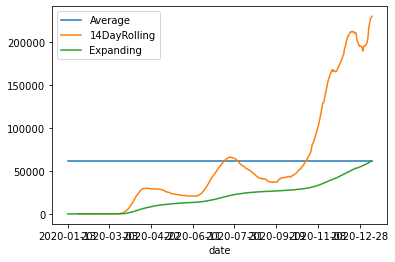

In [110]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/national-history-1-12-2020.csv"

df = pd.read_csv(loc, index_col=0)
df = df[['positiveIncrease']]
df.sort_index(inplace=True)

# Average From All Data:
ave = df.positiveIncrease.mean()
df['Average'] = ave

# 14 Day Rolling Average
df['14DayRolling'] = df.positiveIncrease.rolling(14).mean()

# Expanding Average
df['Expanding'] = df.positiveIncrease.expanding().mean()

# Quick Plot of Data:
df[['Average','14DayRolling','Expanding']].plot()

Thought exercise: What average do you think is the most important for fighting covid?

## Module 5.14: Window - Rolling

Rolling allows us to move a fixed window as we keep progressing through our time series data!

This allows us to calculate things like what is the 7 day rolling average, and similar window functions!

It's pretty easy to use. We just subset a series of data from our DataFrame, and then we can apply the rolling method.

Besides the length of the window, the other main keyword argument is the minimum number of periods. By default, this is generally set to the size of the window. Check out the docs for some specialized windows and changes you can do beyond the basics!

In [121]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/national-history-1-12-2020.csv"

df = pd.read_csv(loc, index_col=0)
df = df[['positiveIncrease']]
df.sort_index(inplace=True)

In [123]:
df['Rolling7Day'] = df.positiveIncrease.rolling(7).mean()
df.head(10)

,positiveIncrease,Rolling7Day
date,,
2020-01-13,0,NaN
2020-01-14,0,NaN
2020-01-15,0,NaN
2020-01-16,0,NaN
2020-01-17,0,NaN
2020-01-18,0,NaN
2020-01-19,1,0.142857
2020-01-20,0,0.142857
2020-01-21,1,0.285714


In [124]:
df['Rolling7DayNoMin'] = df.positiveIncrease.rolling(7, min_periods=1).mean()
df.head(10)

,positiveIncrease,Rolling7Day,Rolling7DayNoMin
date,,,
2020-01-13,0,NaN,0.000000
2020-01-14,0,NaN,0.000000
2020-01-15,0,NaN,0.000000
2020-01-16,0,NaN,0.000000
2020-01-17,0,NaN,0.000000
2020-01-18,0,NaN,0.000000
2020-01-19,1,0.142857,0.142857
2020-01-20,0,0.142857,0.142857
2020-01-21,1,0.285714,0.285714


## Module 5.15: Window - Expanding

Expanding is another type of window! This one goes from the current row in your time series data to the beginning.

These are very useful for year-to-date and beginning-current calculations.

These have a very similar syntax to the above window functions.

Keep in mind that this one will slowly approach the sample average of the series if using the mean function!

In [125]:
loc = "https://raw.githubusercontent.com/mhall-simon/python/main/data/covid/national-history-1-12-2020.csv"

df = pd.read_csv(loc, index_col=0)
df = df[['positiveIncrease']]
df.sort_index(inplace=True)

In [126]:
df['ExpandingAverage'] = df.positiveIncrease.expanding().mean()
df

,positiveIncrease,ExpandingAverage
date,,
2020-01-13,0,0.000000
2020-01-14,0,0.000000
2020-01-15,0,0.000000
2020-01-16,0,0.000000
2020-01-17,0,0.000000
...,...,...
2021-01-08,293104,59771.082873
2021-01-09,266266,60339.939394
2021-01-10,227286,60798.582418


## Summary

You're at the end of the SQL-like functionality!

This serves as a foundational entrance towards working with Data in Python. 

Remember that you can always reference materials while working in Python. The biggest thing to learn is the intuition behind each module, as the syntax is always easy to look up!